<a href="https://colab.research.google.com/github/ajrotert/Machine-Learning/blob/master/DeepLearningWithKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  ## Loading the IMDB dataset

In [0]:
from keras.datasets import imdb
num_words = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=num_words)

    Imports the dataset with the top 10,000 frequently occurring words

Decode words to english (doesn't effect the model)

In [191]:
word_index = imdb.get_word_index()                                                      #mapping words to integers
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])        #mapping integer to words
decodeed_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])   #Decodes the first review
print(decodeed_review);

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Preparing the Data

In [0]:
import numpy as np
def vectorize_sequences(sequence, dimensions=num_words):
  results  = np.zeros((len(sequence), dimensions))          #matrix of all zeros
  for i, sequenced in enumerate(sequence):
    results[i,sequenced] = 1.                               #words turned to ones
  return results

x_train = vectorize_sequences(train_data)                   #vectorize training data
x_test = vectorize_sequences(test_data)                     #vectorize test data

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

##Building Neural Network

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(100, activation='elu', input_shape=(num_words,))) # input layer

model.add(layers.Dense(50, activation='elu'))                           # Hidden layer
model.add(layers.Dropout(.2))
model.add(layers.Dense(50, activation='elu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(50, activation='elu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(50, activation='elu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(25, activation='elu'))
model.add(layers.Dropout(.2))
model.add(layers.Dense(10, activation='elu'))
model.add(layers.Dropout(.2))

model.add(layers.Dense(1, activation='sigmoid'))                         # output layer

In [0]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(), loss = losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

## Training model


In [0]:
x_val = x_train[:num_words]
partial_x_train = x_train[num_words:]
y_val = y_train[:num_words]
partial_y_train = y_train[num_words:]

In [196]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=10,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 17s 1ms/step - loss: 0.3740 - binary_accuracy: 0.8469 - val_loss: 0.3165 - val_binary_accuracy: 0.8853
Epoch 2/20
15000/15000 [==============================] - 14s 932us/step - loss: 0.2468 - binary_accuracy: 0.9149 - val_loss: 0.2986 - val_binary_accuracy: 0.8923
Epoch 3/20
15000/15000 [==============================] - 14s 933us/step - loss: 0.2074 - binary_accuracy: 0.9306 - val_loss: 0.3187 - val_binary_accuracy: 0.8894
Epoch 4/20
15000/15000 [==============================] - 14s 917us/step - loss: 0.1914 - binary_accuracy: 0.9401 - val_loss: 0.3332 - val_binary_accuracy: 0.8874
Epoch 5/20
15000/15000 [==============================] - 14s 913us/step - loss: 0.1770 - binary_accuracy: 0.9472 - val_loss: 0.2906 - val_binary_accuracy: 0.8883
Epoch 6/20
15000/15000 [==============================] - 14s 936us/step - loss: 0.1659 - binary_accuracy: 0.9557 - val_loss: 0.2986 - va

## Visualize Results

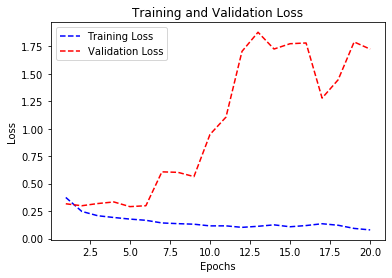

In [197]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'b--', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r--', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

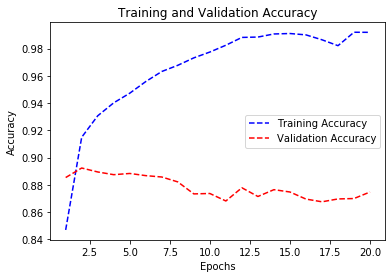

In [198]:
plt.clf()
acc=history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'b--', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r--', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



## Making Predictions

In [199]:
pre = model.predict(x_test)

accuracy_matrix = np.array([[0,0],[0,0]])

for i in range(num_words):
  pos1 = int(round(pre[i,0]))
  pos2 = int((y_test[i]))
  accuracy_matrix[pos1,pos2]+=1

print('accuracy: ', (accuracy_matrix[0,0]+accuracy_matrix[1,1])/num_words)
print(accuracy_matrix)

accuracy:  0.8586
[[4401  788]
 [ 626 4185]]


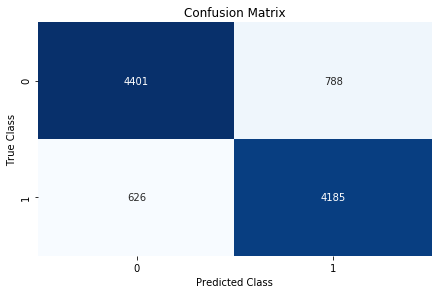

In [200]:
import pandas as pd
import seaborn as sns

plt.clf()
cm = pd.DataFrame(accuracy_matrix)
sns.heatmap(cm, annot=True, cbar=None, cmap='Blues',fmt='2.0f')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()